## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


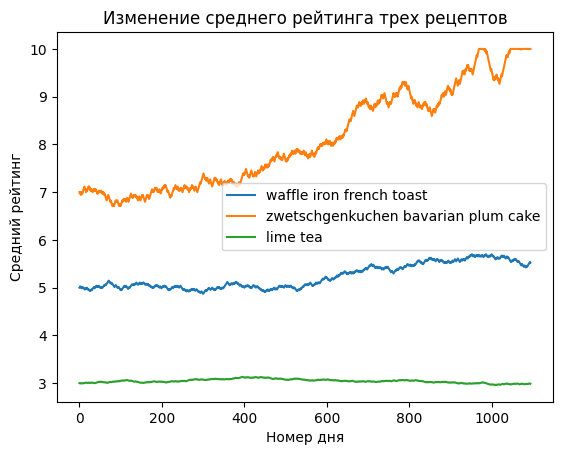

In [ ]:
unit = pd.DataFrame(np.transpose(np.load('average_ratings.npy')))
recipe = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea']

for i, rec in enumerate(recipe):
    plt.plot(unit.index, unit.iloc[:, i], label=rec)

plt.title("Изменение среднего рейтинга трех рецептов")
plt.xlabel("Номер дня")
plt.ylabel("Средний рейтинг")

plt.legend()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


<ipython-input-20-fa53b5d942ce>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dates = pd.date_range('01.01.2019', '30.12.2021')


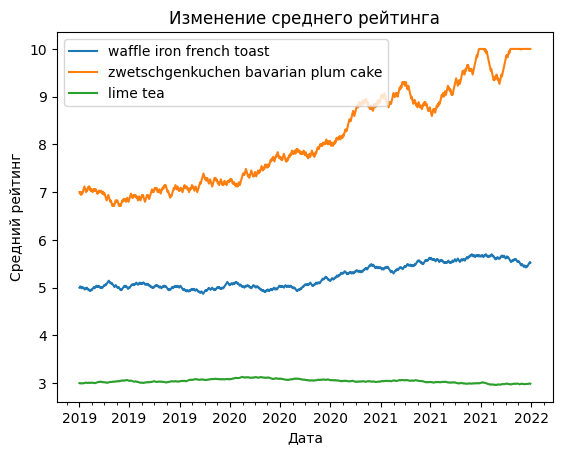

In [ ]:
dates = pd.date_range('01.01.2019', '30.12.2021')
fig, ax = plt.subplots()
for i in range(3):
  ax.plot(dates,unit[i],label=recipe[i])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.legend(loc='upper left')

ax.set(title='Изменение среднего рейтинга',
       xlabel='Дата',
       ylabel='Средний рейтинг')
plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

<ipython-input-23-5bfae4821c57>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dates = pd.date_range('01.01.2019', '30.12.2021')


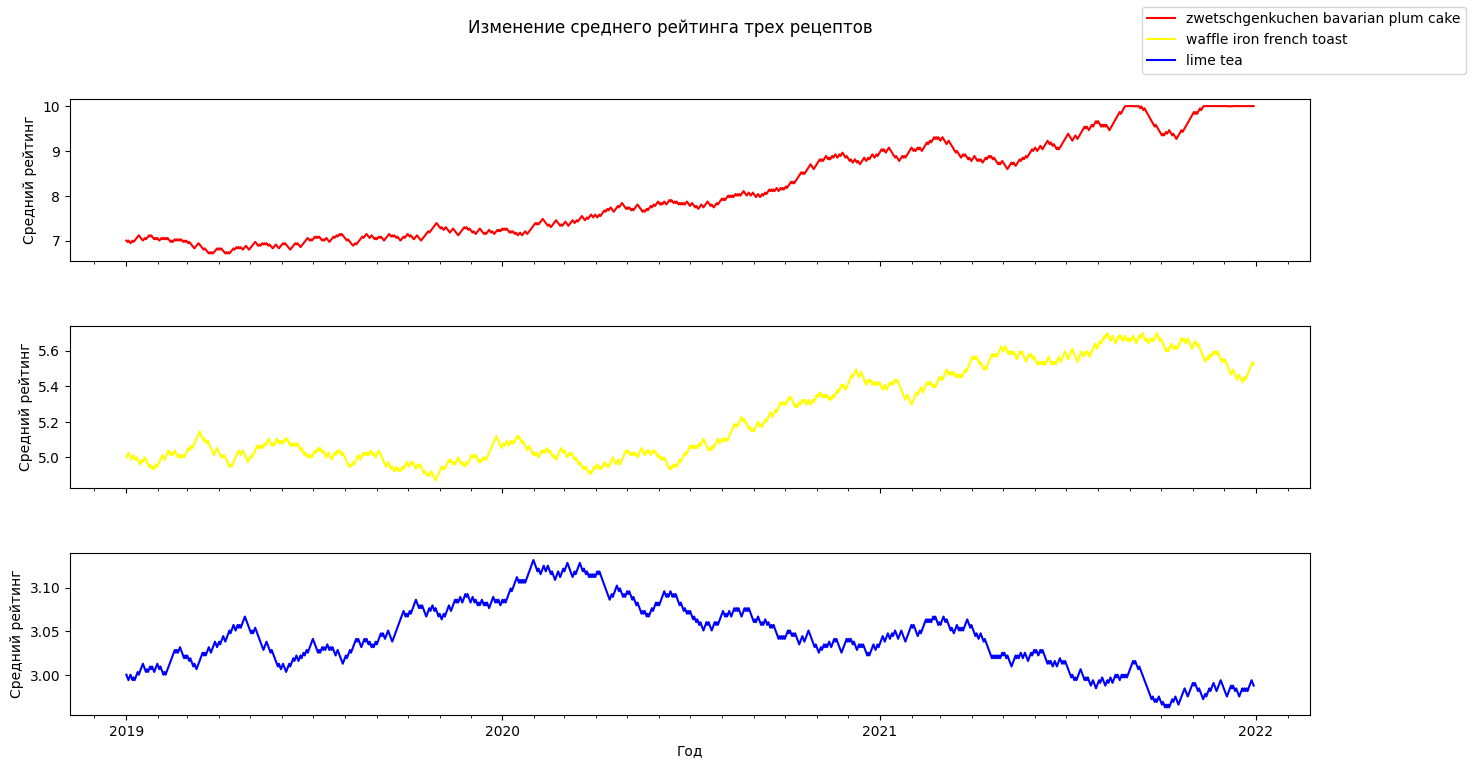

In [ ]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(16,8))

dates = pd.date_range('01.01.2019', '30.12.2021')

axs[0].plot(dates, unit[1], color='red', label='zwetschgenkuchen bavarian plum cake')
axs[1].plot(dates, unit[0], color='yellow', label='waffle iron french toast')
axs[2].plot(dates, unit[2], color='blue', label='lime tea')

axs[0].set_ylabel('Средний рейтинг')
axs[1].set_ylabel('Средний рейтинг')
axs[2].set_xlabel('Год')
axs[2].set_ylabel('Средний рейтинг')

plt.subplots_adjust(hspace=0.4)

fig.legend()
plt.suptitle('Изменение среднего рейтинга трех рецептов')

axs[2].xaxis.set_major_locator(mdates.YearLocator())
axs[2].xaxis.set_minor_locator(mdates.MonthLocator())

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


Text(0.5, 0.98, 'Изменение количества пользователей в линейном и логарифмическом масштабе')

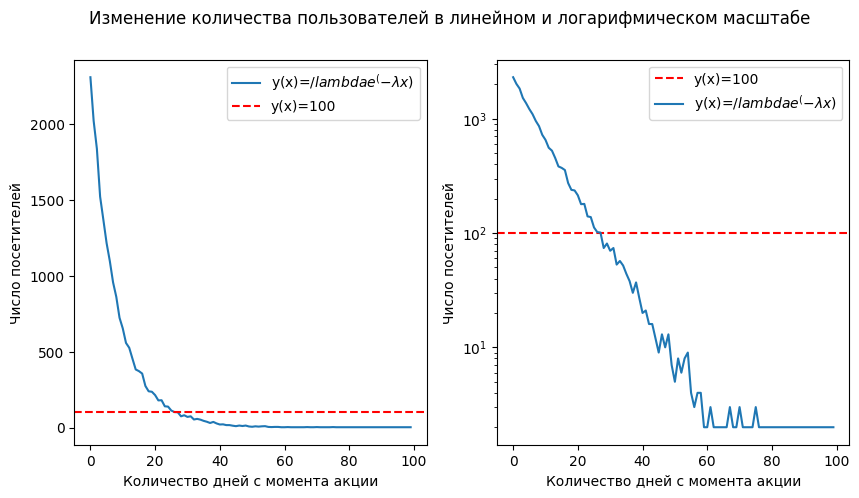

In [ ]:
visitors = np.load('visitors.npy')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax2.set_yscale('log')

a = ax1.plot(visitors, label='y(x)=$/lambda$$e^(-\lambda x)$')
lin1 = ax1.axhline(y=100, color='r', linestyle='--', label='y(x)=100',)
lin2 = ax2.axhline(y=100, color='r', linestyle='--', label='y(x)=100')
b = ax2.plot(visitors, label='y(x)=$/lambda$$e^(-\lambda x)$')

ax1.legend()
ax2.legend()
for ax in [ax1, ax2]:
    ax.set_xlabel('Количество дней с момента акции')
    ax.set_ylabel('Число посетителей')
plt.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
reviews = pd.read_csv('/content/reviews_sample.csv')
recipes = pd.read_csv('/content/recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

Text(0.5, 1.0, 'Размеры групп рецептов')

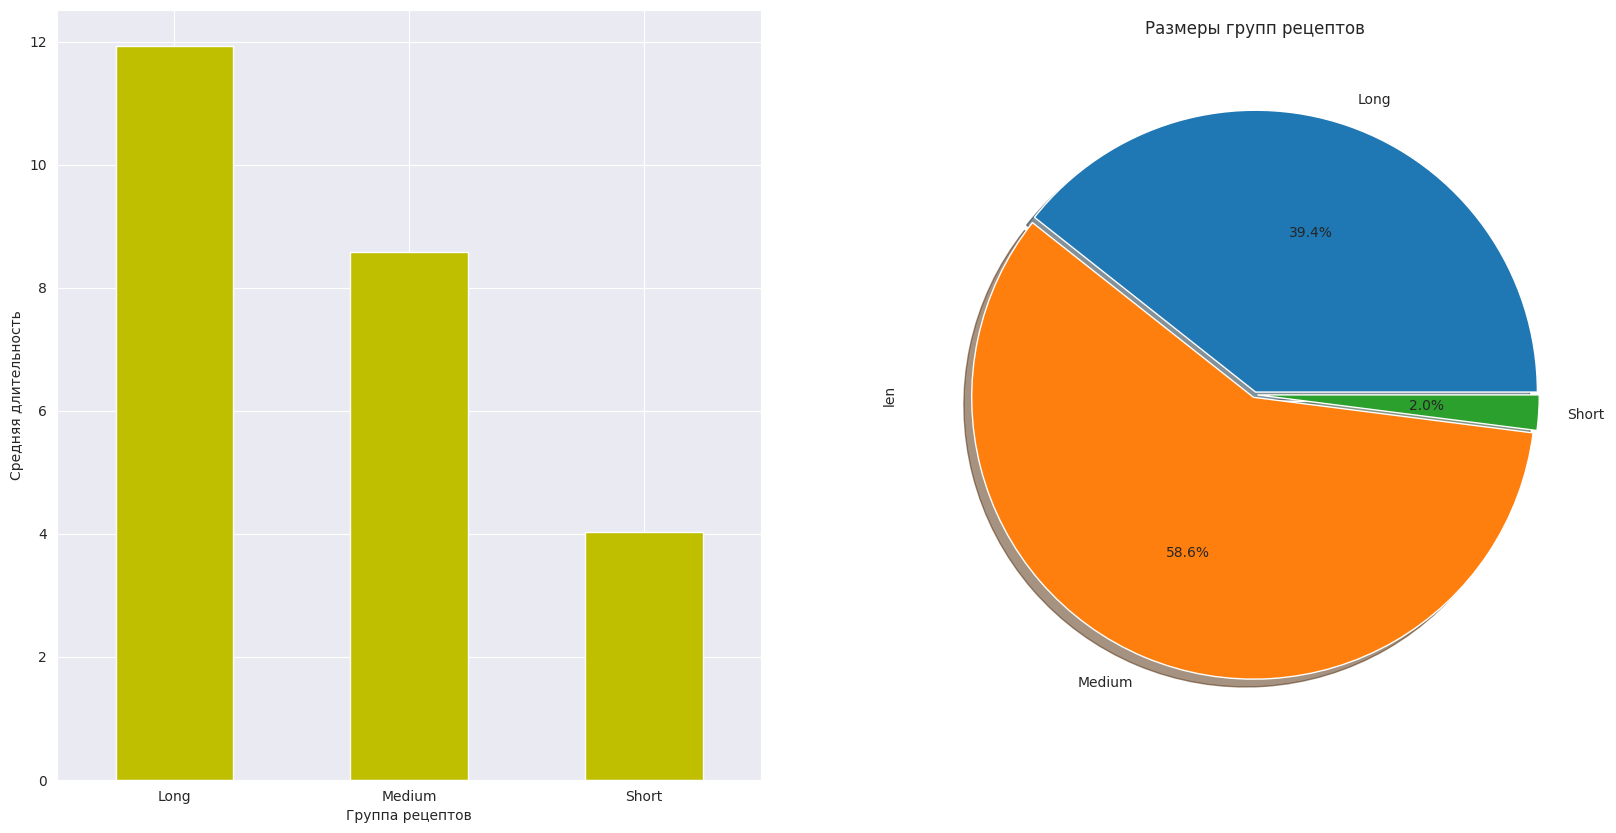

In [ ]:
recipes = recipes.dropna().reset_index(drop=True)

def groups(input_):
    if input_ < 5:
        return 'Short'
    elif 5 <= input_ < 50:
        return 'Medium'
    else:
        return 'Long'

recipes['type'] = recipes['minutes'].apply(groups)

group = recipes.groupby('type')['n_steps'].agg([np.mean, len])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

group['mean'].plot(kind='bar', ax=ax[0], color='y', rot=0, edgecolor='white')
ax[0].set_xlabel('Группа рецептов')
ax[0].set_ylabel('Средняя длительность')

group['len'].plot(kind='pie', ax=ax[1], explode=(0.01, 0.01, 0.01), autopct='%1.1f%%', shadow=True)
ax[1].set_title('Размеры групп рецептов')

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

<Axes: ylabel='Frequency'>

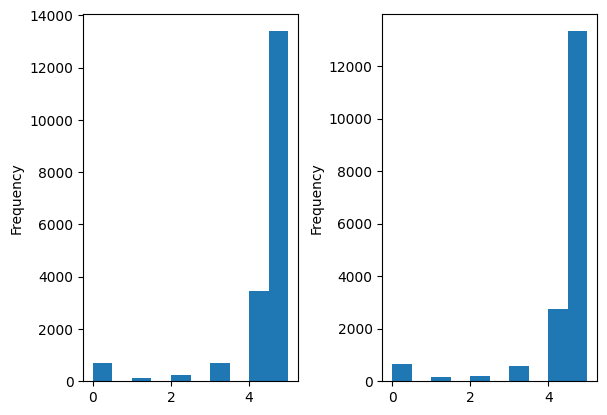

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.tight_layout(pad=3)
reviews[(reviews['date'] >= '2008-01-01') & (reviews['date'] < '2009-01-01')]['rating'].plot.hist(ax=ax1)
reviews[(reviews['date'] >= '2009-01-01') & (reviews['date'] < '2010-01-01')]['rating'].plot.hist(ax=ax2)

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

<Axes: xlabel='n_steps', ylabel='n_ingredients'>

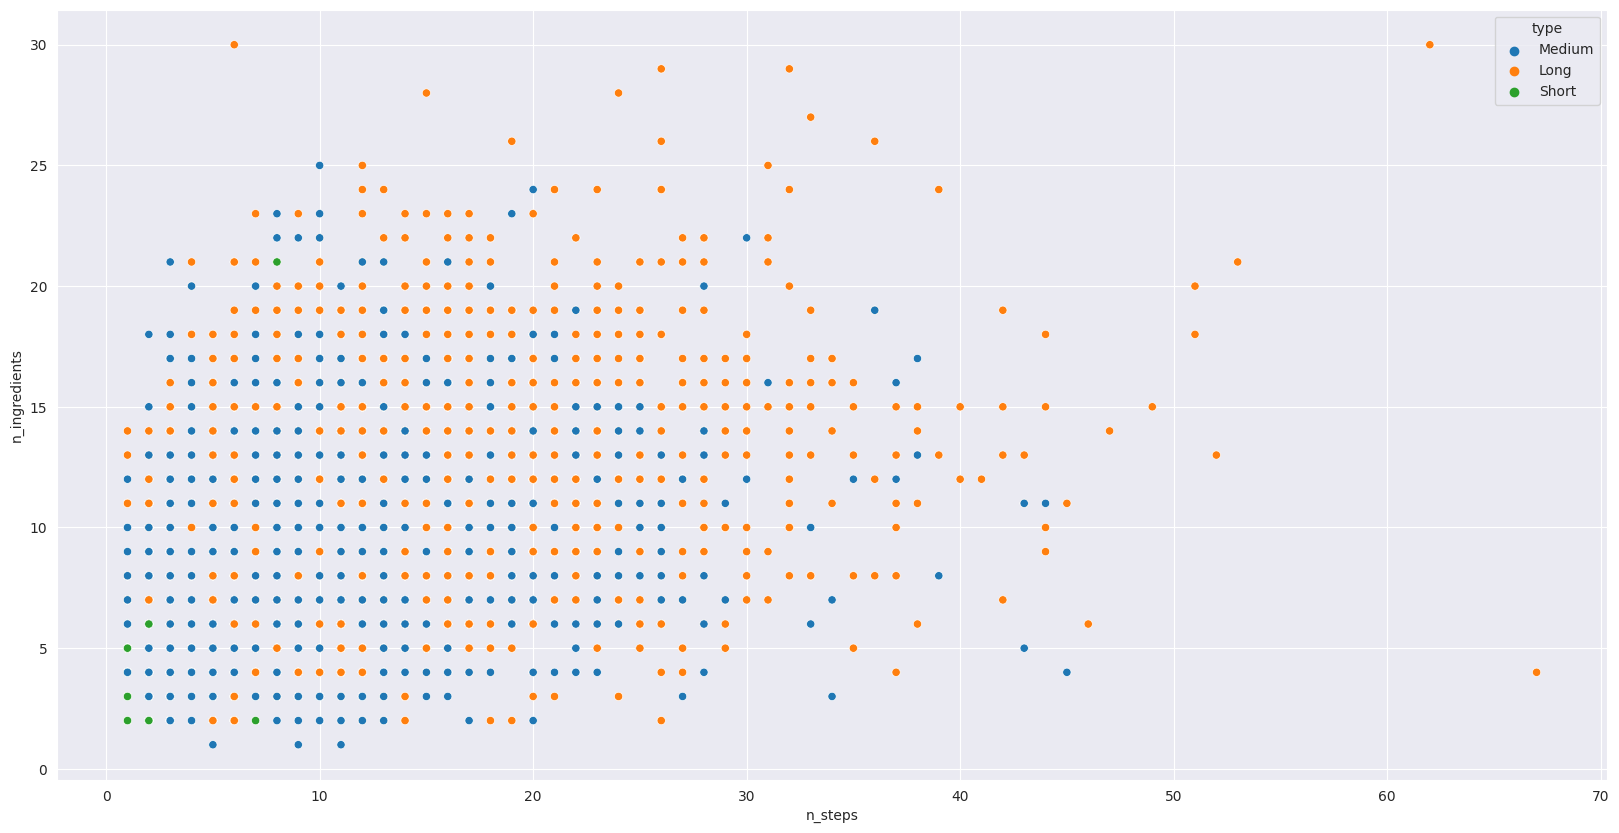

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
sns.scatterplot(data=recipes, x="n_steps", y="n_ingredients",hue='type',ax=ax)

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

<Axes: >

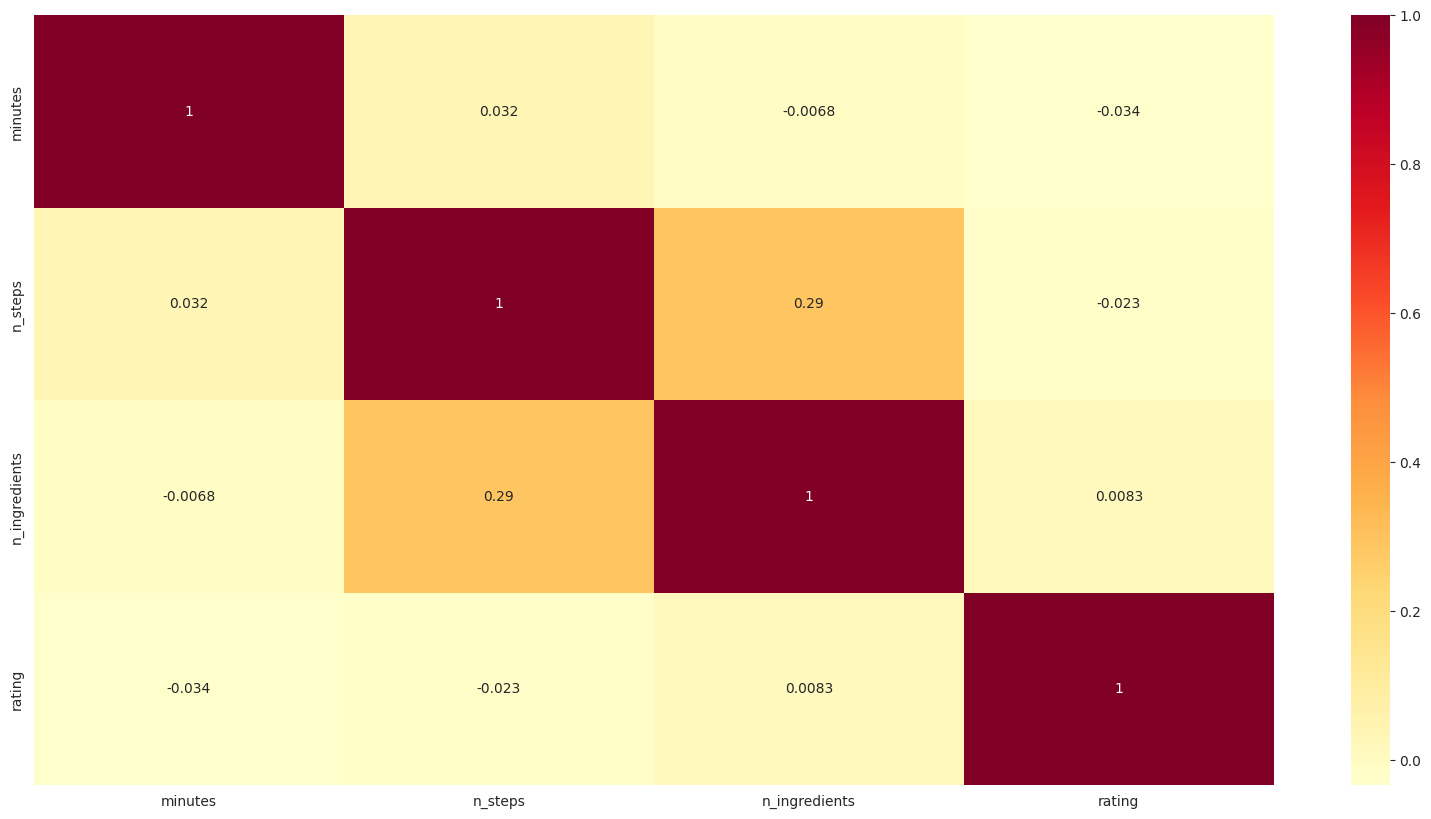

In [ ]:
columns = ['minutes', 'n_steps', 'n_ingredients', 'rating']
unitt = recipes.merge(reviews,left_on='id',right_on='recipe_id')[columns]
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(20,10))
corr_matrix = unitt.corr()

sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')